# Extended Kalman Filters

## 1. Overview of the Kalman Filter Algorithm Map

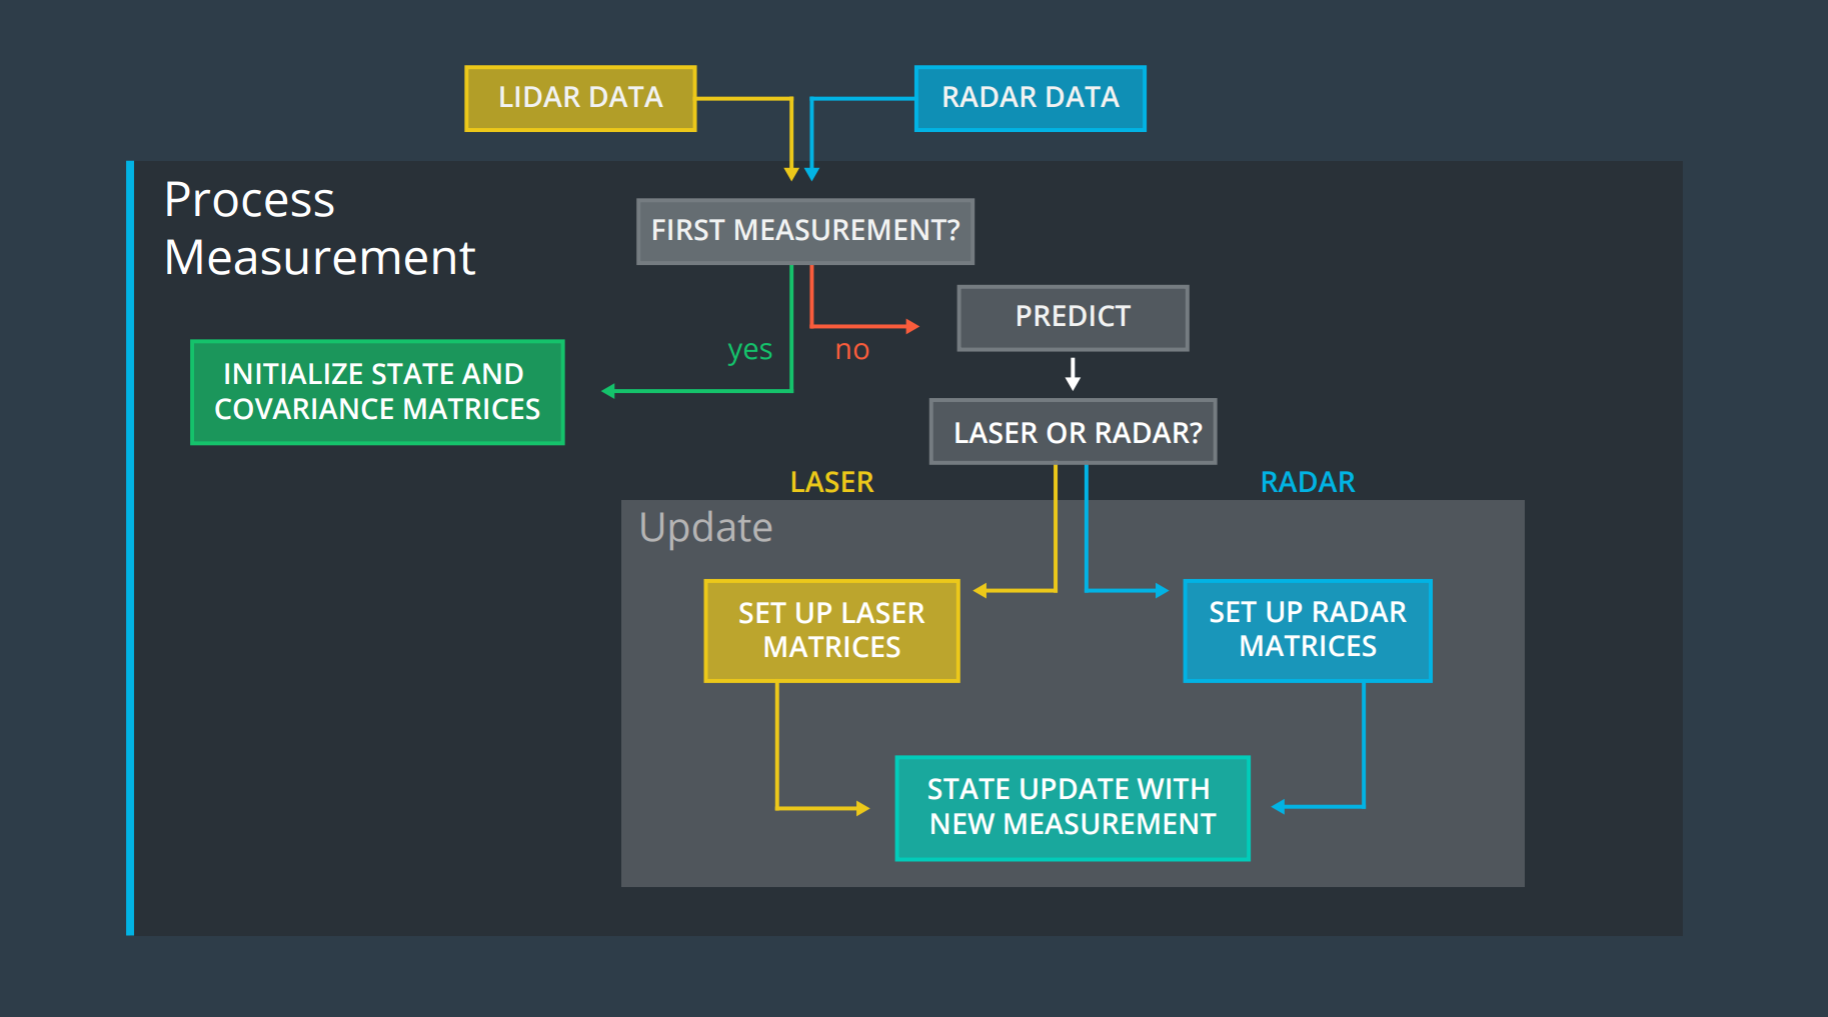

Imagine you are in a car equipped with sensors on the outside. The car sensors can detect objects moving around: for example, the sensors might detect a pedestrian, as described in the video, or even a bicycle. For variety, let's step through the Kalman Filter algorithm using the bicycle example.

The Kalman Filter algorithm will go through the following steps:
* **first measurement** - the filter will receive initial measurements of the bicycle's position relative to the car. These measurements will come from a radar or lidar sensor.
* **initialize state and covariance matrices** - the filter will initialize the bicycle's position based on the first measurement.
* then the car will receive another sensor measurement after a time period Δt.
* **predict** - the algorithm will predict where the bicycle will be after time Δt. One basic way to predict the bicycle location after Δt is to assume the bicycle's velocity is constant; thus the bicycle will have moved velocity * Δt. In the extended Kalman filter lesson, we will assume the velocity is constant.
* **update** - the filter compares the "predicted" location with what the sensor measurement says. The predicted location and the measured location are combined to give an updated location. The Kalman filter will put more weight on either the predicted location or the measured location depending on the uncertainty of each value.
* then the car will receive another sensor measurement after a time period Δt. The algorithm then does another **predict** and **update** step.

## 2. Estimation Problem Refresh

## Definition of Variables

* x is the mean state vector. For an extended Kalman filter, the mean state vector contains information about the object's position and velocity that you are tracking. It is called the "mean" state vector because position and velocity are represented by a gaussian distribution with mean xx.
* P is the state covariance matrix, which contains information about the uncertainty of the object's position and velocity. You can think of it as containing standard deviations.
* k represents time steps. So x_k refers to the object's position and velocity vector at time k.
* The notation k+1∣k refers to the prediction step. At time k+1, you receive a sensor measurement. Before taking into account the sensor measurement to update your belief about the object's position and velocity, you predict where you think the object will be at time k+1k+1. You can predict the position of the object at k+1k+1 based on its position and velocity at time kk. Hence x_k+1∣k means that you have predicted where the object will be at k+1k+1 but have not yet taken the sensor measurement into account.
* x_k+1 means that you have now predicted where the object will be at time k+1k+1 and then used the sensor measurement to update the object's position and velocity.

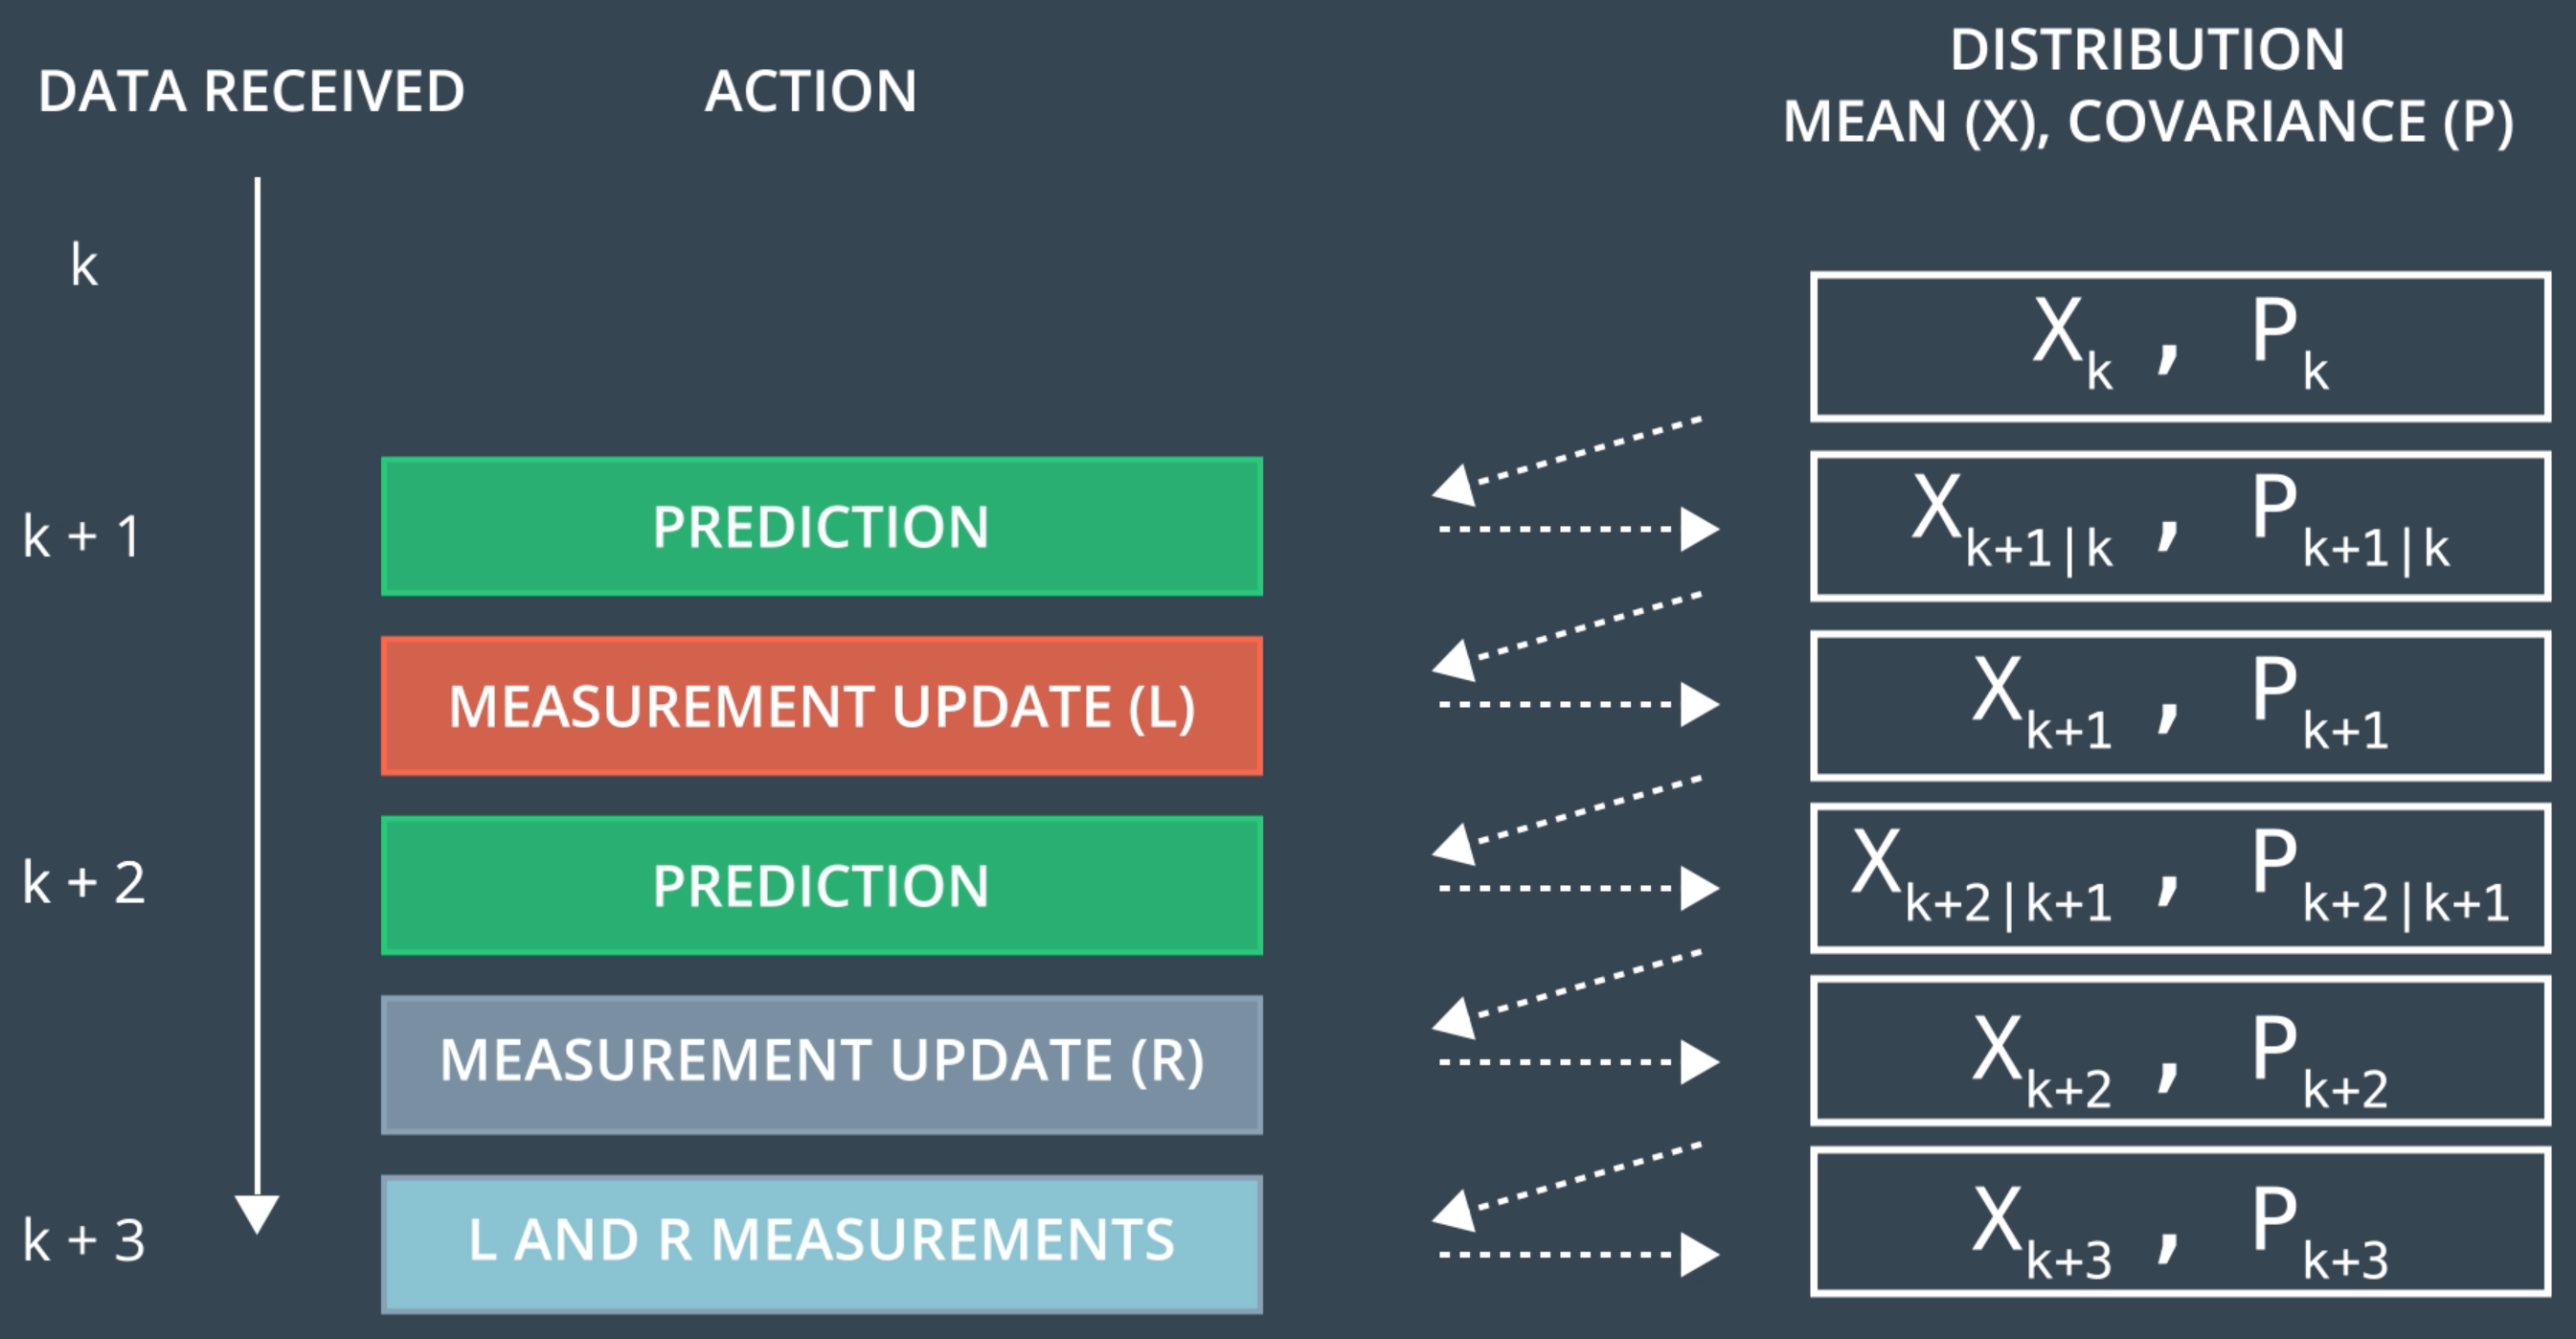

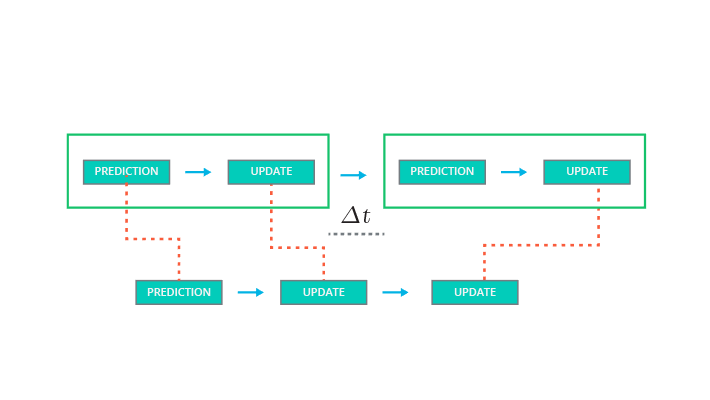

Because we have already run a prediction-update iteration with the first sensor at time k+3, the output of the second prediction at time k+3 will actually be identical to the output from the update step with the first sensor. So, in theory, you could skip the second prediction step and just run a **prediction, update, update iteration**.

But you'll learn more about that later. First, a bit of math.

## Kalman Filter Intuition

The Kalman equation contains many variables, so here is a high level overview to get some intuition about what the Kalman filter is doing.

### Prediction

Let's say we know an object's current position and velocity , which we keep in the x variable. Now one second has passed. We can predict where the object will be one second later because we knew the object position and velocity one second ago; we'll just assume the object kept going at the same velocity.

The x' = Fx + ν equation does these prediction calculations for us.

But maybe the object didn't maintain the exact same velocity. Maybe the object changed direction, accelerated or decelerated. So when we predict the position one second later, our uncertainty increases. P' = FPF^T + Q represents this increase in uncertainty.

Process noise refers to the uncertainty in the prediction step. We assume the object travels at a constant velocity, but in reality, the object might accelerate or decelerate. The notation ν ∼ N(0,Q) defines the process noise as a gaussian distribution with mean zero and covariance Q.

Update
Now we get some sensor information that tells where the object is relative to the car. First we compare where we think we are with what the sensor data tells us y = z - Hx'.

The K matrix, often called the Kalman filter gain, combines the uncertainty of where we think we are P' with the uncertainty of our sensor measurement R. If our sensor measurements are very uncertain (R is high relative to P'), then the Kalman filter will give more weight to where we think we are: x'. If where we think we are is uncertain (P' is high relative to R), the Kalman filter will put more weight on the sensor measurement: z.

Measurement noise refers to uncertainty in sensor measurements. The notation ω ∼ N(0,R) defines the measurement noise as a gaussian distribution with mean zero and covariance R. Measurement noise comes from uncertainty in sensor measurements.

### A Note About the State Transition Function: Bu

If you go back to the video, you'll notice that the state transition function was first given as x' = Fx + Bu + ν.

But then Bu was crossed out leaving x' = Fx + ν.

B is a matrix called the control input matrix and uu is the control vector.

As an example, let's say we were tracking a car and we knew for certain how much the car's motor was going to accelerate or decelerate over time; in other words, we had an equation to model the exact amount of acceleration at any given moment. Bu would represent the updated position of the car due to the internal force of the motor. We would use ν to represent any random noise that we could not precisely predict like if the car slipped on the road or a strong wind moved the car.

For the Kalman filter lessons, we will assume that there is no way to measure or know the exact acceleration of a tracked object. For example, if we were in an autonomous vehicle tracking a bicycle, pedestrian or another car, we would not be able to model the internal forces of the other object; hence, we do not know for certain what the other object's acceleration is. Instead, we will set Bu = 0 and represent acceleration as a random noise with mean ν.


## Kalman Filter Equations in C++
Now, let's do a quick refresher of the Kalman Filter for a simple 1D motion case. Let's say that your goal is to track a pedestrian with state xx that is described by a position and velocity.

